# 2D primitives

In [2]:
import cv2,random
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/input/lena.jpg')

In [2]:
# cv2.imshow('input image',img)
# cv2.waitKey(0)&0xFF

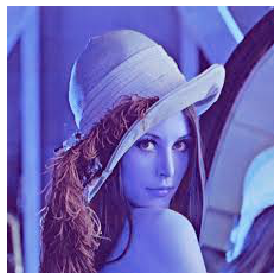

In [4]:
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

In [3]:
w, h = img.shape[1], img.shape[0]
print(w,h)

def rand_pt(mult=1.):
    return (random.randrange(int(w*mult)),
            random.randrange(int(h*mult)))

225 225


Syntax:
<font size = "3" color="blue">
 
- line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
- circle(img, center, radius, color[, thickness[, lineType[, shift]]])
- rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
- putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) 

## Circle

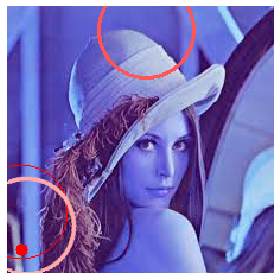

In [6]:
cv2.circle(img, rand_pt(), 40, (255, 0, 0))
cv2.circle(img, rand_pt(), 5, (255, 0, 0), cv2.FILLED)
cv2.circle(img, rand_pt(), 40, (255, 85, 85), 2)
cv2.circle(img, rand_pt(), 40, (255, 170, 170), 2, cv2.LINE_AA)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

## Line

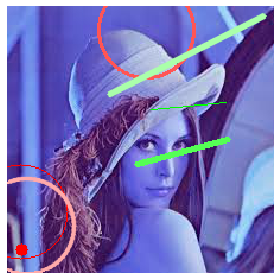

In [7]:
cv2.line(img, rand_pt(), rand_pt(), (0, 255, 0))
cv2.line(img, rand_pt(), rand_pt(), (85, 255, 85), 3)
cv2.line(img, rand_pt(), rand_pt(), (170, 255, 170), 3, cv2.LINE_AA)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

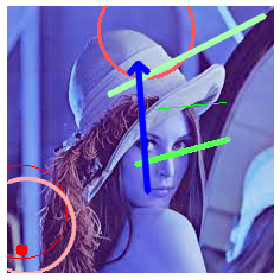

In [8]:
cv2.arrowedLine(img, rand_pt(), rand_pt(), (0, 0, 255), 3, cv2.LINE_AA)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

## Rectangular

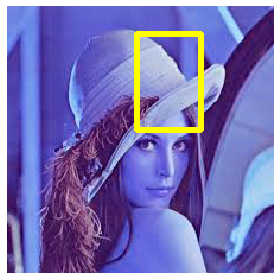

In [4]:
cv2.rectangle(img, rand_pt(), rand_pt(), (255, 255, 0), 3)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

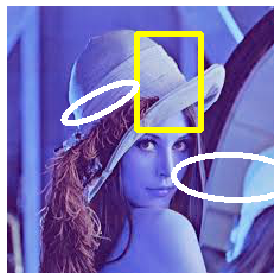

In [6]:
cv2.ellipse(img, rand_pt(), rand_pt(0.3), random.randrange(360), 0, 360, (255, 255, 255), 3)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

## Text

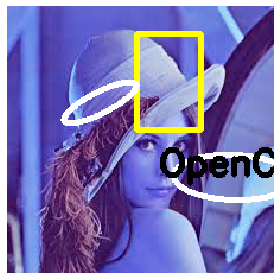

In [7]:
cv2.putText(img, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

In [8]:
cv2.imwrite('images/output/2Dprimitive.jpg',img)

True

# Geometric transformations of images

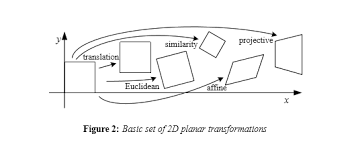

In [9]:
from IPython.display import Image
Image(filename='./images/input/2Dplanartransformations.png',width=500)

## Scaling an image

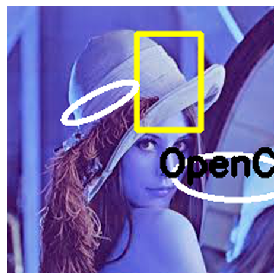

In [10]:
resized_image = cv2.resize(img, (w * 2, h * 2), interpolation=cv2.INTER_CUBIC)
cv2.imshow('input image',resized_image)
plt.axis('off')
plt.imshow(resized_image, cmap='gray')
plt.tight_layout()
plt.show()

<font size="3">
    Note:<br>
    The five interpolation methods provided with OpenCV are <b>cv2.INTER_NEAREST</b> (nearest neighbor interpolation), <b> cv2.INTER_LINEAR</b> (bilinear interpolation), <b>cv2.INTER_AREA</b> (resampling using pixel area relation), <b>cv2.INTER_CUBIC</b> (bicubic interpolation), and<b> cv2.INTER_LANCZOS4 </b>(sinusoidal interpolation).</font>

<h2 color="red"> Translating an image</h2>

<font size="3">Note:<br>
    In order to translate an object, you need to create the 2 x 3 transformation matrix by using the NumPy array with float values providing the translation in both the x and y directions in pixels </font>

In [11]:
import numpy as np

In [12]:
M = np.float32([[1, 0, 200], [0, 1, 30]])
#warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
dst_image = cv2.warpAffine(img, M, (w, h))

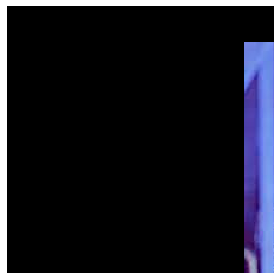

In [13]:
plt.axis('off')
plt.imshow(dst_image, cmap='gray')
plt.tight_layout()
plt.show()

In [14]:
M = np.float32([[1, 0, -200], [0, 1, -30]])
dst_image = cv2.warpAffine(img, M, (w, h))

In [15]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img3.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])


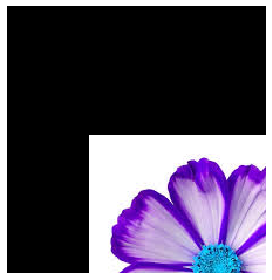

In [16]:

img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
plt.axis('off')
plt.imshow(img_translation, cmap='gray')
plt.tight_layout()
plt.show()

<font size="3">
To understand the preceding code, we need to understand how warping works. Translation basically means that we are shifting the image by adding/subtracting the X and Y coordinates. In order to do this, we need to create a transformation matrix, as shown as follows:
</font>

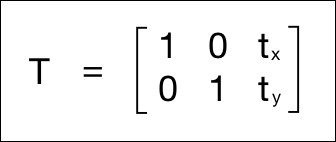

In [17]:
from IPython.display import Image
Image(filename='./images/input/trasimg.jpg',width=400)

<font size="3">
Here, the tx and ty values are the X and Y translation values, that is, the image will be moved by X units towards the right, and by Y units downwards. So once we create a matrix like this, we can use the function, warpAffine, to apply to our image. The third argument in warpAffine refers to the number of rows and columns in the resulting image. Since the number of rows and columns is the same as the original image, the resultant image is going to get cropped. The reason for this is because we didn't have enough space in the output when we applied the translation matrix.
</font>

In [18]:
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))

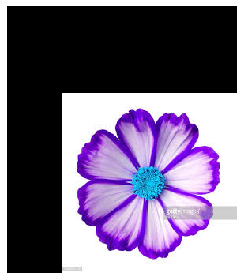

In [19]:
plt.axis('off')
plt.imshow(img_translation, cmap='gray')
plt.tight_layout()
plt.show()

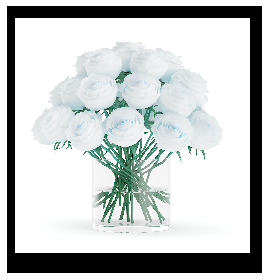

In [20]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img4.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
plt.axis('off')
plt.imshow(img_translation, cmap='gray')
plt.tight_layout()
plt.show()

## Rotating an image

<font size="3">
In order to understand this, let's see how we handle rotation mathematically. Rotation is also a form of transformation, and we can achieve it by using the following transformation matrix:
</font>

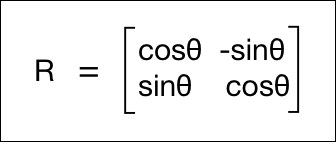

In [1]:
from IPython.display import Image
Image(filename='./images/input/rotate.jpg',width=400)

<font size="3">Here, θ is the angle of rotation in the counterclockwise direction. OpenCV provides closer control over the creation of this matrix through the function, <b>getRotationMatrix2D.</b> We can specify the point around which the image would be rotated, the angle of rotation in degrees, and a scaling factor for the image. Once we have the transformation matrix, we can use the warpAffine function to apply this matrix to any image.

As we can see from the previous figure, the image content goes out of boundary and gets cropped. In order to prevent this, we need to provide enough space in the output image. Let's go ahead and do that using the translation functionality we discussed earlier:</font>

In [21]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img1.jpg')
height, width = img.shape[:2]
M = cv2.getRotationMatrix2D((width/ 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(img, M, (width, height))

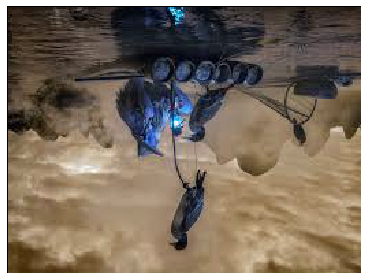

In [22]:
plt.axis('off')
plt.imshow(dst_image, cmap='gray')
plt.tight_layout()
plt.show()

## Affine transformation of an image

<font size="3">
An affine transformation is a transformation where points, straight lines, and planes are preserved. Additionally, the parallel lines will remain parallel after this transformation. However, an affine transformation does not preserve both the distance and angles between points.<br>
    
    In an affine transformation, we first make use of the cv2.getAffineTransform() function to build the 2 x 3 transformation matrix, which will be obtained from the input image and the corresponding coordinates in the transformed image. Finally, this M matrix is passed to cv2.warpAffine(), as follows:
</font>

<font size="3" color="green">
Before talking about affine transformations, let's see what Euclidean transformations are. Euclidean transformations are a type of geometric transformations that preserve length and angle measure. As in, if we take a geometric shape and apply Euclidean transformation to it, the shape will remain unchanged. It might look rotated, shifted, and so on, but the basic structure will not change. So technically, lines will remain lines, planes will remain planes, squares will remain squares, and circles will remain circles.

</font>

<font size="3" color="blue">Coming back to affine transformations, we can say that they are generalizations of Euclidean transformations. Under the realm of affine transformations, lines will remain lines but squares might become rectangles or parallelograms. Basically, affine transformations don't preserve lengths and angles.
</font>

<font size="3" color="darkyellow">
In order to build a general affine transformation matrix, we need to define the control points. Once we have these control points, we need to decide where we want them to be mapped. In this particular situation, all we need are three points in the source image, and three points in the output image. Let's see how we can convert an image into a parallelogram-like image:
</font>

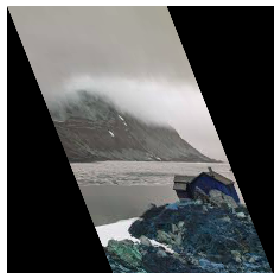

In [23]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img2.jpg')
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()

<font size="3" color="deeppink">Note:As we discussed earlier, we are defining control points. We just need three points to get the affine transformation matrix. We want the three points in src_points to be mapped to the corresponding points in dst_points. We are mapping the points as shown in the following:</font>

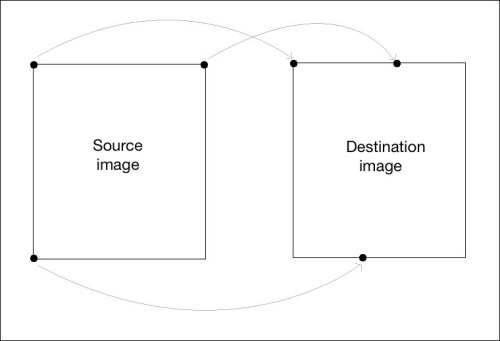

In [12]:
from IPython.display import Image
Image(filename='./images/input/affine.jpg',width=400)

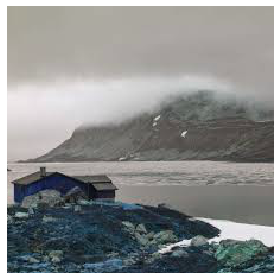

In [26]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

plt.axis('off')
#plt.imshow(img, cmap='gray')
plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()

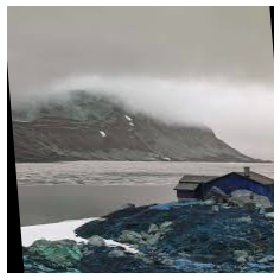

In [27]:
import numpy as np
pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(img, M, (w, h))
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(dst_image, cmap='gray')
plt.tight_layout()
plt.show()

## Perspective transformation of an image

<font size="3" color="darkorchid">Affine transformations are nice, but they impose certain restrictions. A projective transformation, on the other hand, gives us more freedom. It is also referred to as homography. In order to understand projective transformations, we need to understand how projective geometry works. We basically describe what happens to an image when the point of view is changed. For example, if you are standing right in front of a sheet of paper with a square drawn on it, it will look like a square. Now, if you start tilting that sheet of paper, the square will start looking more and more like a trapezoid. Projective transformations allow us to capture this dynamic in a nice mathematical way. These transformations preserve neither sizes nor angles, but they do preserve incidence and cross-ratio.</font>

<font size="3" color="olive">Now that we know what projective transformations are, let's see if we can extract more information here. We can say that any two images on a given plane are related by a homography. As long as they are in the same plane, we can transform anything into anything else. This has many practical applications such as augmented reality, image rectification, image registration, or the computation of camera motion between two images. Once the camera rotation and translation have been extracted from an estimated homography matrix, this information may be used for navigation, or to insert models of 3D objects into an image or video. This way, they are rendered with the correct perspective and it will look like they were part of the original scene.</font>

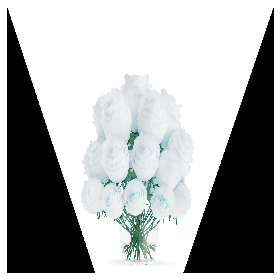

In [28]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img4.jpg')
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]]) 
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()

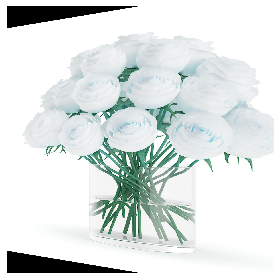

In [29]:
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0], [cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101], [cols/2,0], [cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()

<font size="3" color="brown">
Note:
    In order to correct the perspective (also known as perspective transformation), you will need to create the transformation matrix by making use of the<b> cv2.getPerspectiveTransform()</b> function, where a 3 x 3 matrix is constructed. This function needs four pairs of points (coordinates of a quadrangle in both the source and output image) and calculates a perspective transformation matrix from these points. Then, the M matrix is passed to <b>cv2.warpPerspective(),</b> where the source image is transformed by applying the specified matrix with a specified size, as shown in the following code</font>

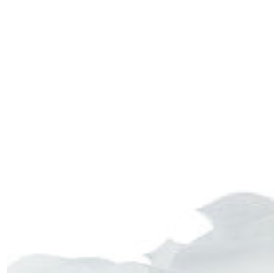

In [30]:
pts_1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])
pts_2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts_1, pts_2)
dst_image = cv2.warpPerspective(img, M, (300, 300))
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(dst_image, cmap='gray')
plt.tight_layout()
plt.show()

## Cropping an image

In [32]:
dst_image = img[80:200, 230:330]

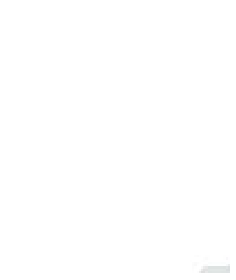

In [33]:
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(dst_image, cmap='gray')
plt.tight_layout()
plt.show()

## Image color spaces

In [17]:
import cv2
#print ([x for x in dir(cv2) if x.startswith('COLOR_')])

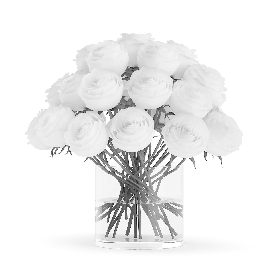

In [34]:
import cv2
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(gray_img, cmap='gray')
plt.tight_layout()
plt.show()

In [35]:
cv2.imwrite('images/output/gray_img.jpg',gray_img)

True

In [36]:
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

In [37]:
cv2.imwrite('images/output/yuv_img.jpg',yuv_img)

True

In [12]:
cv2.imshow('Y channel', yuv_img[:, :, 0])
cv2.imshow('U channel', yuv_img[:, :, 1])
cv2.imshow('V channel', yuv_img[:, :, 2])
cv2.waitKey()

-1

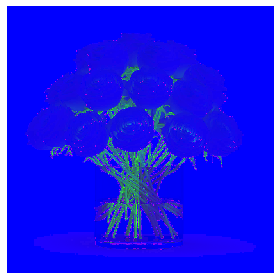

True

In [38]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.axis('off')
#plt.imshow(dst_image, cmap='gray')
plt.imshow(hsv_img, cmap='gray')
plt.tight_layout()
plt.show()
cv2.imwrite('images/output/hsv_img.jpg',hsv_img)

## Image warping

Let's have some more fun with the images and see what else we can achieve. Projective transformations are pretty flexible, but they still impose some restrictions on how we can transform the points. What if we want to do something completely random? We need more control, right? As it so happens, we can do that as well. We just need to create our own mapping, and it's not that difficult. Following are a few effects you can achieve with image warping:

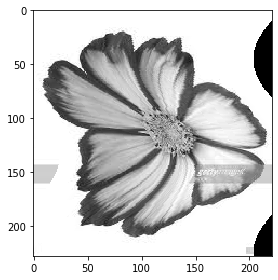

In [3]:
import cv2
import numpy as np
import math


img = cv2.imread('./images/input/img3.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0
plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()

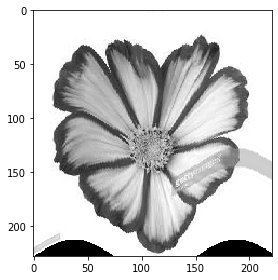

In [4]:

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()


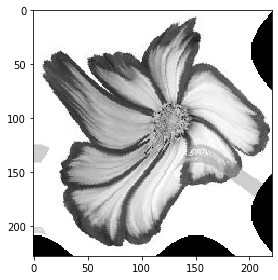

In [5]:
#####################
# Both horizontal and vertical 

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()


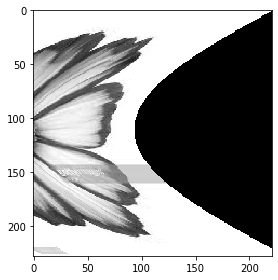

In [6]:
#####################
# Concave effect

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0


plt.imshow(img_output, cmap='gray')
plt.tight_layout()
plt.show()